### 생선 분류
- 데이터셋: fish.csv
- feature(특성)/입력 데이터: weight, Length
- 타겟/클래스/출력: Species
<br><br>
- 지도학습 / 분류
<br>
- 분류 알고리즘: KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### [1] 데이터 준비

In [2]:
DATA_FILE = '../data/fish.csv'

In [3]:
# 행: Bream, Smelt
# 칼럼: Species, Weight, Height -> 0,1,2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(5)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
mask = (fishDF['Species'] == 'Bream')|(fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.head(5)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
# Species 컬럼 수치화
names = twoDF['Species'].unique().tolist()
species_to_code = {name:idx for idx, name in enumerate(names,1)}

new_cols = twoDF.loc[:, 'Species'].replace(species_to_code)
twoDF['Fish_Code'] = new_cols
# twoDF['Code'] = twoDF['Species'].replace(species_to_code)
twoDF.head(3)

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_28664\3712887191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['Code'] = twoDF['Species'].replace(species_to_code)


,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1


#### [2] 피쳐 & 타겟 선언

In [7]:
feature = twoDF[ ['Weight','Length'] ]
target = twoDF['Code']

print(f'features => {feature.shape}, {feature.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


In [ ]:
# 검증 데이터셋으로 예측 결과(predict) & 타겟 비교
pre_target = model.predict(validation_data)
pre_target[0] == target

True

#### [3] 학습용/테스트용 데이터셋 준비

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
# train : test = 80:20	==>		test_size = 0.2 or train_size = 0.8
# stratify --> 분류일 때만 사용, 분류 타겟의 종류 비율 고려
X_train, X_test, Y_train, Y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    stratify=target, 
                                                    random_state=10)

In [9]:
print(f'X_train => {X_train.shape}, {X_train.ndim}D')
print(f'Y_train => {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test => {X_test.shape}, {X_test.ndim}D')
print(f'Y_test => {Y_test.shape}, {Y_test.ndim}D')

X_train => (39, 2), 2D
Y_train => (39,), 1D
X_test => (10, 2), 2D
Y_test => (10,), 1D


In [29]:
Y_train.value_counts()[1]

28

##### target 0(Bream), 1(Smelt) 비율 확인
- test dataset
- train dataset 비교!!

In [30]:
print(f'Train Bream ratio:	{Y_train.value_counts()[1]/Y_train.shape[0]}')
print(f'Train Smelt ratio:	{Y_train.value_counts()[2]/Y_train.shape[0]}')

Train Bream ratio:	0.717948717948718
Train Smelt ratio:	0.28205128205128205


In [32]:
print(f'Test Bream ratio:	{Y_test.value_counts()[1]/Y_test.shape[0]}')
print(f'Test Smelt ratio:	{Y_test.value_counts()[2]/Y_test.shape[0]}')

Test Bream ratio:	0.7
Test Smelt ratio:	0.3


#### [4] 학습/훈련
- 학습 알고리즘 인스턴스 생성

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()

In [21]:
# 학습 진행 w/ train_dataset
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [22]:
# 학습 후 파라미터 확인
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([1, 2], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

#### [5] 모델 성능평가 w/ test dataset
- score 메소드

In [23]:
model.score(X_test, Y_test)

1.0

#### [6] 예측하기
- 학습/훈련 and 테스트로 사용하지 않은 데이터 사용
- 주의: 입력 데이터 Dim == 2d

In [33]:
new_data = [ [413, 27.8]]
model.predict(new_data)
''' 
X does not have valid feature names
		--> train, test data가 DF라 컬럼명이 있어서 생기는 에러!!
		--> 입력 데이터 DF화!!
'''

c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [42]:
new_data = pd.DataFrame( [ [413, 27.8]], columns=model.feature_names_in_)
new_data

,Weight,Length
0,413,27.8


In [43]:
model.predict(new_data)

array([1], dtype=int64)

##### 최근접한 K개 데이터 찾기


In [44]:
dist, idx = model.kneighbors(new_data)
print(dist)
print()
print(idx)

[[17.04230031 23.10497782 37.04875167 37.0653477  50.01439793]]

[[25  0 21  6 22]]


In [45]:
### idx 차원 2D --> 1D
### idx array --> list
neighbors = idx.reshape(-1).tolist()		# reshpae(-1) 1차원 배열 반환
print(neighbors)

[25, 0, 21, 6, 22]


In [46]:
twoDF.iloc[neighbors]

,Species,Weight,Length,Code
25,Bream,725.0,35.0,1
0,Bream,242.0,25.4,1
21,Bream,685.0,34.0,1
6,Bream,500.0,29.7,1
22,Bream,620.0,34.5,1


#### [7] 시각화

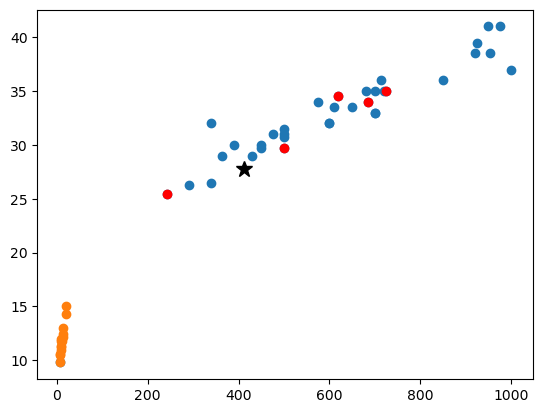

In [53]:
plt.scatter(twoDF.loc[:35,'Weight'], twoDF.loc[:35,'Length'])
plt.scatter(twoDF.loc[35:,'Weight'], twoDF.loc[35:,'Length'])
plt.plot(new_data['Weight'], new_data['Length'], 'k*', markersize=12)		# 새로운 데이터 입력
plt.plot(twoDF.loc[neighbors,'Weight'], twoDF.loc[neighbors,'Length'], 'ro')
plt.show()

weight 값 범위 (0~1000) <br>
length 값 범위 (10~40)	<br>
			--> Weight 값에 더 가중되어 거리 계산 <br>
			--> 각 피쳐의 값 범위를 정규화(normalization)!! <br>
			--> min-max, z-score